In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\aryan\Downloads\heart_failure_clinical_records_dataset.csv")

# Display the first few rows of the dataset
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


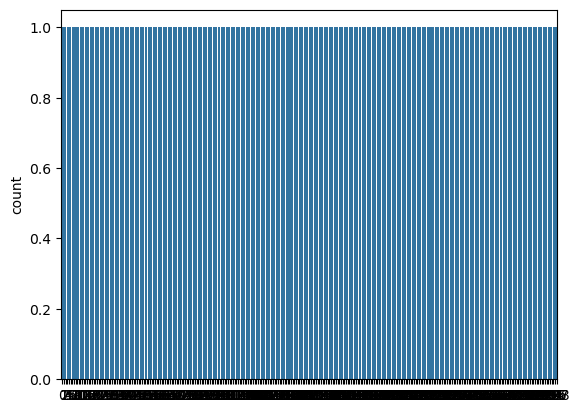

In [3]:
# Check for missing values
df.isnull().sum()

# Get basic statistics of the dataset
df.describe()

# Visualize the distribution of the target variable (e.g., heart failure outcome)
sns.countplot(df['ejection_fraction']) 
plt.show()


In [4]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

# Convert boolean columns to 0 and 1
df['anaemia'] = df['anaemia'].astype(int)
df['diabetes'] = df['diabetes'].astype(int)
df['high_blood_pressure'] = df['high_blood_pressure'].astype(int)

# Handle any missing values
df.fillna(df.mean(), inplace=True)

# Split the data into features and target variable
X = df.drop('ejection_fraction', axis=1) 
y = df['ejection_fraction'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 1 0 0 0 0]
 [0 0 0 2 2 4 1 0 0 0 0 0]
 [0 0 0 2 1 0 1 2 0 0 0 0]
 [0 0 0 0 3 2 3 3 0 0 0 0]
 [0 0 2 1 0 1 3 0 0 0 0 0]
 [0 0 1 0 0 2 0 1 0 0 1 0]
 [0 0 0 2 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 1 2 2 1 2 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         4
          25       0.17      0.22      0.19         9
          30       0.10      0.17      0.12         6
          35       0.15      0.18      0.17        11
          38       0.33      0.43      0.38         7
          40       0.11      0.20      0.14         5
          45       1.00      0.33      0.50         3
          50       1.00      0.25      0.40         4
          60       0.00      0.00   

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryan\anaconda3\Lib\site-packages\sklea

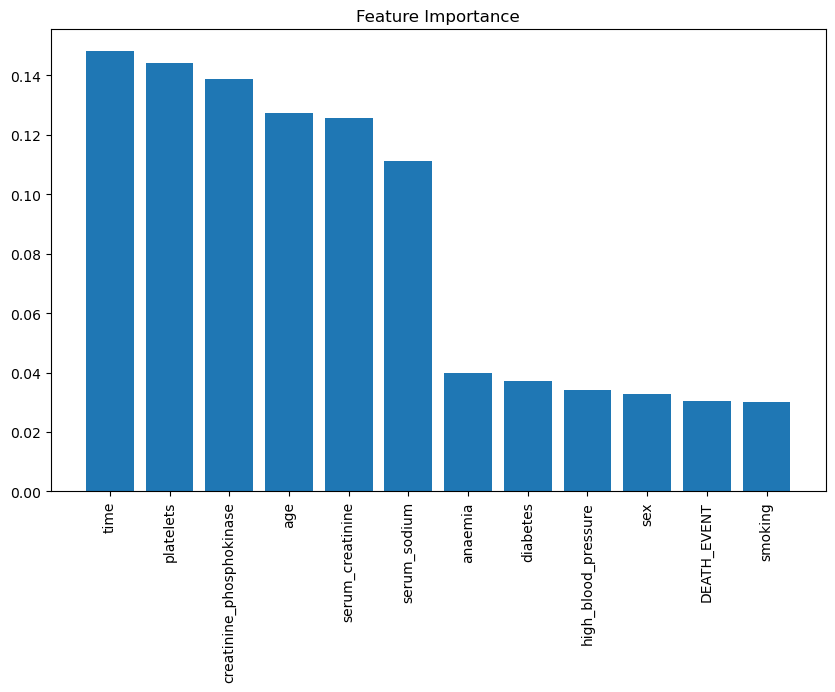

In [7]:
# Visualize feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [8]:
import joblib

In [9]:
# Save the trained model to a file
model_filename = 'heart_failure_model.pkl'
joblib.dump(model, model_filename)

['heart_failure_model.pkl']

In [10]:
loaded_model = joblib.load(model_filename)

In [11]:
# Example test input (assuming you've standardized your input data)
# The values should correspond to the features in the same order they were trained.

test_input = np.array([[60, 0, 233, 1, 45, 0, 250, 1.0, 137, 1,0,1]])  # Replace with actual test values
test_input = scaler.transform(test_input)  # Apply the same scaling as used during training

# Predict using the loaded model
prediction = loaded_model.predict(test_input)

# Output the prediction
print("Prediction:", prediction)


Prediction: [20]


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
